In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skplt
from tqdm import tqdm
from gensim.models.doc2vec import TaggedDocument
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,recall_score,precision_score
from sklearn.neighbors import KNeighborsClassifier
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
tweets_df =  pd.read_csv("tweets_preproc.csv")
tweets_df = tweets_df.drop('Unnamed: 0', axis=1)
tweets_df

,text,author,source,timestamp,id,Puntuaciones,Puntuacion,Polaridad,Texto Preprocesado,Raiz Palabras
0,estrenos mensuales en netflix disney y prime ...,159917675,Twitter for iPhone,2022-01-01 01:22:09,1477087717167087621,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,Neutral,estrenos mensuales netflix disney prime video ...,estren mensual netflix disney prim vide blog
1,albert alfred y la magia echa serie music...,385918940,Twitter for Android,2022-01-01 02:27:16,1477104103926996994,"{'neg': 0.0, 'neu': 0.945, 'pos': 0.055, 'comp...",0.421,Positivo,albert alfredo magia echa serie musica literat...,albert alfred magi echa seri music literatur n...
2,tratar a todos los equipos de futbol en las r...,238286158,Talon Android,2022-01-01 08:20:30,1477192997016113153,"{'neg': 0.0, 'neu': 0.748, 'pos': 0.252, 'comp...",0.402,Positivo,tratar equipos futbol retransmisiones igual,trat equip futbol retransmision igual
3,bajada de precio de la fibra mejorar la calid...,82388144,Twitter for Android,2022-01-01 08:51:51,1477200887663804421,"{'neg': 0.081, 'neu': 0.704, 'pos': 0.215, 'co...",0.557,Positivo,bajada precio fibra mejorar calidad sonido ima...,baj preci fibr mejor calid son imag canal mejo...
4,postes de cortando la dp a la altura del km e...,196401713,Twitter for iPhone,2022-01-01 09:22:55,1477208706182000640,"{'neg': 0.097, 'neu': 0.903, 'pos': 0.0, 'comp...",-0.128,Negativo,postes cortando altura km ares corona,post cort altur km ares coron
...,...,...,...,...,...,...,...,...,...,...
159851,los clientes ya sabemos eso los que no se sab...,1227852829257326592,Twitter Web App,2022-06-30 20:26:43,1542605573895725056,"{'neg': 0.056, 'neu': 0.792, 'pos': 0.151, 'co...",0.476,Positivo,clientes sabemos saben cumplen contrato deberi...,client sab sab cumpl contrat deberi leer contr...
159852,lo que me gustaria saber es por que llevo una...,1168354052,Twitter for Android,2022-06-30 21:07:14,1542615768289902592,"{'neg': 0.0, 'neu': 0.796, 'pos': 0.204, 'comp...",0.827,Positivo,gustaria saber llevo semana contratando servic...,gustari sab llev seman contrat servici ofert g...
159853,deberias cambiar esa bandera absurda o ahora ...,1397178749985202176,Twitter for Android,2022-06-30 21:55:32,1542627925358481409,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,Neutral,deberias cambiar bandera absurda ahora lobo,deberi cambi bander absurd ahor lob
159854,ya me falta poco y cambio de empresa suerte,452596569,Twitter for Android,2022-06-30 22:17:56,1542633561169305602,"{'neg': 0.0, 'neu': 0.732, 'pos': 0.268, 'comp...",0.509,Positivo,falta cambio empresa suerte,falt cambi empres suert


In [3]:
tweets_positivo_df = tweets_df[tweets_df['Polaridad'] == "Positivo"]
tweets_positivo_df = tweets_positivo_df.dropna()
tweets_positivo_df = tweets_positivo_df.sample(n = 20000)

tweets_negativo_df = tweets_df[tweets_df['Polaridad'] == "Negativo"]
tweets_negativo_df = tweets_negativo_df.dropna()
tweets_negativo_df = tweets_negativo_df.sample(n = 20000)

tweets_df = pd.concat([tweets_positivo_df,tweets_negativo_df])
tweets_df

,text,author,source,timestamp,id,Puntuaciones,Puntuacion,Polaridad,Texto Preprocesado,Raiz Palabras
85363,hoy gracias a de participo en el sorteo de un...,251622598,Twitter for Android,2022-05-11 13:03:52,1524374732816236545,"{'neg': 0.0, 'neu': 0.936, 'pos': 0.064, 'comp...",0.493,Positivo,hoy gracias participo sorteo viajes personas s...,hoy graci particip sorte viaj person san sebas...
70891,estoy a la espera de una respuesta gracias,1501136594744578048,Twitter Web App,2022-03-09 17:53:51,1501617275106963461,"{'neg': 0.0, 'neu': 0.707, 'pos': 0.293, 'comp...",0.440,Positivo,espera respuesta gracias,esper respuest graci
64526,lo mejor que te puede pasar esta semana ganar ...,941221454,Twitter for iPhone,2022-02-16 09:24:44,1493879004700581889,"{'neg': 0.033, 'neu': 0.693, 'pos': 0.275, 'co...",0.917,Positivo,mejor puede pasar semana ganar auriculares ina...,mejor pued pas seman gan auricular inalambr fr...
4459,creo que lo que les pasa a estas grandes emp...,227802437,Twitter for Android,2022-01-25 20:20:12,1486071427711348745,"{'neg': 0.0, 'neu': 0.95, 'pos': 0.05, 'compou...",0.153,Positivo,creo pasa grandes empresas capacidad atender g...,cre pas grand empres capac atend gran cantid c...
109123,ojala,1498011678486716420,Twitter for Android,2022-03-24 20:33:37,1507093300314001411,"{'neg': 0.0, 'neu': 0.722, 'pos': 0.278, 'comp...",0.402,Positivo,ojala,ojal
...,...,...,...,...,...,...,...,...,...,...
104581,senores de es increible todavia me siguen co...,197568493,Twitter Web App,2022-02-16 12:47:24,1493930010243215364,"{'neg': 0.247, 'neu': 0.663, 'pos': 0.091, 'co...",-0.856,Negativo,senores increible todavia siguen cobrando habe...,senor increibl todavi sig cobr hab tramit baj ...
55347,suerte necesito yo cuando me vais a devolve...,429010828,Twitter for iPhone,2022-01-18 12:42:06,1483419426590445568,"{'neg': 0.119, 'neu': 0.881, 'pos': 0.0, 'comp...",-0.402,Negativo,suerte necesito vais devolver dinero problemas,suert necesit vais devolv diner problem
275,tampoco es asi y trabajo en la competencia,242482984,Twitter for iPhone,2022-01-03 20:35:03,1478102628626223106,"{'neg': 0.14, 'neu': 0.86, 'pos': 0.0, 'compou...",-0.276,Negativo,tampoco si trabajo competencia,tampoc si trabaj competent
133745,servicio de atencion a empresas penoso cada a...,393336713,Twitter for iPad,2022-03-16 21:16:40,1504205027631673355,"{'neg': 0.217, 'neu': 0.783, 'pos': 0.0, 'comp...",-0.892,Negativo,servicio atencion empresas penoso cada agente ...,servici atencion empres penos cad agent dic co...


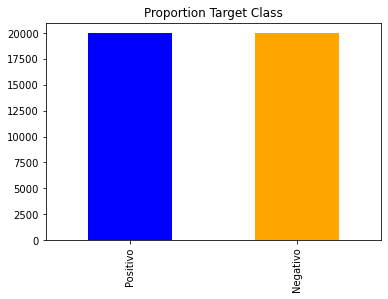

In [4]:
count_class=pd.value_counts(tweets_df["Polaridad"], sort= True)
count_class.plot(kind= 'bar', color= ["blue", "orange"])
plt.title('Proportion Target Class')
plt.show()

In [5]:
tweets_df['Texto Preprocesado'] = tweets_df['Texto Preprocesado'].astype(str)

In [6]:
main_text = tweets_df['Texto Preprocesado']
target = tweets_df['Polaridad']

In [7]:
n_classes = np.unique(target)
n_classes

array(['Negativo', 'Positivo'], dtype=object)

In [8]:
def add_label(tweet):
    output = []
    for i, s in zip(tweet.index, tweet):
        output.append(TaggedDocument(s, ["tweet_" + str(i)]))
    return output

In [9]:
labeled_tweets = add_label(main_text)

In [10]:
#Necesitamos vectorizar el conjunto de tweets utilizando Doc2Vec
from gensim.models import Doc2Vec

d2v_model = Doc2Vec(vector_size=100, min_count=5, epochs=10)
d2v_model.build_vocab([i for i in tqdm(labeled_tweets)])
d2v_model.train(labeled_tweets, total_examples=len(tweets_df['Texto Preprocesado']),epochs=10)
# Crea los vectores de tweets
docvec_arrays = np.zeros((len(tweets_df['Texto Preprocesado']), 100))
for i in range(len(tweets_df)):
    docvec_arrays[i,:] = d2v_model.docvecs[i].reshape((1,100))
docvec_df = pd.DataFrame(docvec_arrays)
docvec_df.shape
# Etiqueta todos los tweets
labeled_reviews = add_label(tweets_df['Texto Preprocesado'])

100%|██████████| 40000/40000 [00:00<00:00, 2667114.33it/s]
C:\Users\curri\AppData\Local\Temp/ipykernel_1560/3853302831.py:10: DeprecationWarning: Call to deprecated `docvecs` (The `docvecs` property has been renamed `dv`.).
  docvec_arrays[i,:] = d2v_model.docvecs[i].reshape((1,100))


In [11]:
#Definimos conjunto de entrenamiento y test
X = docvec_df #Tweet
y = target #Positivo o Negativo

X_train, X_test, y_train, y_test  = train_test_split(X,y,train_size=0.9,random_state=0)

In [12]:
#Instanciamos y entremaos el clasificador KNeighbors con los hiperparametros por defecto
kn = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None).fit(X_train, y_train)

In [13]:
#Predecimos
kn_predict = kn.predict(X_test)

In [14]:
kn_report = accuracy_score(y_test,kn_predict)
print('Accuracy:',kn_report)

Accuracy: 0.7945


In [15]:
kn_report1 = recall_score(y_test,kn_predict,pos_label='Positivo',average='binary')
print('Recall:',kn_report1)

Recall: 0.8382573860791187


In [16]:
kn_report2 = precision_score(y_test,kn_predict,pos_label='Positivo',average='binary')
print('Precision:',kn_report2)

Precision: 0.7703635526921307


<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

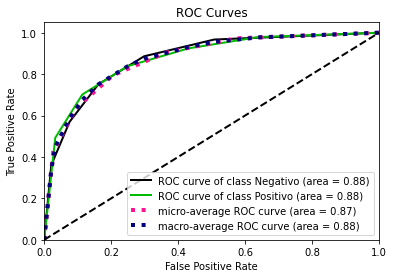

In [17]:
skplt.metrics.plot_roc(y_test, kn.predict_proba(X_test))